# 1. Data Set Review & Description

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def read_csv(csv_url):
    return pd.read_csv(csv_url)

In [3]:
def is_null(df):
    return df.isnull().sum().sort_values(ascending=False)

In [4]:
def outlier_thresholds(df, col_name, q1 = 0.05, q3 = 0.95 ):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * interquantile_range
    lower_limit = quartile1- 1.5 * interquantile_range
    return lower_limit,upper_limit

def get_outliers(df, col_name):
    # get outlier thresholds
    low, up = outlier_thresholds(df, col_name)
    # Return the outliers
    return df.loc[((df[col_name] < low) | (df[col_name] > up)), col_name]

In [5]:
# Using min-max normalization 
# Range between 0-1
def min_max_norm(df,col):
   return (df[col] - df[col].min()) / (df[col].max() - df[col].min())   

## Unpaid care work dataset

- Unpaid care work refers to all unpaid services provided within a household for its members, including care of persons, housework and
voluntary community work.
- Source : https://ourworldindata.org/grapher/female-to-male-ratio-of-time-devoted-to-unpaid-care-work
- Year : 2014
- 69 Countries

In [6]:
df_unpaid_care_work = read_csv('data/1-female-to-male-ratio-of-time-devoted-to-unpaid-care-work.csv')

In [7]:
df_unpaid_care_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Entity                                                                  69 non-null     object 
 1   Code                                                                    68 non-null     object 
 2   Year                                                                    69 non-null     int64  
 3   Female to male ratio of time devoted to unpaid care work (OECD (2014))  69 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


- The ratio is calculated by dividing the average time spent by females by the average time spent by males.

In [8]:
df_unpaid_care_work.head()

,Entity,Code,Year,Female to male ratio of time devoted to unpaid care work (OECD (2014))
0,Albania,ALB,2014,7.21
1,Algeria,DZA,2014,6.75
2,Argentina,ARG,2014,2.88
3,Armenia,ARM,2014,5.24
4,Australia,AUS,2014,1.81


In [9]:
df_unpaid_care_work_2 =read_csv('data/4-female-to-male-ratio-of-time-devoted-to-unpaid-care-work.csv')

In [10]:
df_unpaid_care_work_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Entity                                                                  69 non-null     object 
 1   Code                                                                    68 non-null     object 
 2   Year                                                                    69 non-null     int64  
 3   Female to male ratio of time devoted to unpaid care work (OECD (2014))  69 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


In [11]:
# It seems two datasets are the same 
# Because there is one null value code returns false
(df_unpaid_care_work_2 == df_unpaid_care_work).all()

Entity                                                                     True
Code                                                                      False
Year                                                                       True
Female to male ratio of time devoted to unpaid care work (OECD (2014))     True
dtype: bool

In [12]:
# Deleting one of the dataframes because it already exists
del df_unpaid_care_work_2

In [13]:
# All the countries are unique
# There 69 countries
df_unpaid_care_work['Entity'].nunique()

69

In [14]:
# There is one null value
# It is not important 
is_null(df_unpaid_care_work)

Code                                                                      1
Entity                                                                    0
Year                                                                      0
Female to male ratio of time devoted to unpaid care work (OECD (2014))    0
dtype: int64

In [15]:
# Changing the column name for readability
df_unpaid_care_work = df_unpaid_care_work.rename(columns={"Female to male ratio of time devoted to unpaid care work (OECD (2014))": "f_to_m_unpaid_care_work_ratio"})

In [16]:
# Data only contains information about 2014
df_unpaid_care_work.describe()

,Year,f_to_m_unpaid_care_work_ratio
count,69.0,69.000000
mean,2014.0,3.248696
std,0.0,2.510711
min,2014.0,1.180000
25%,2014.0,1.810000
50%,2014.0,2.530000
75%,2014.0,3.380000
max,2014.0,17.290000


In [17]:
# Normalizing the ratio for better understanding
df_unpaid_care_work['normalized_ratio'] = min_max_norm(df_unpaid_care_work,'f_to_m_unpaid_care_work_ratio')



In [18]:
outlier_thresholds(df_unpaid_care_work,'normalized_ratio')

(-0.5150217256362506, 0.924581005586592)

In [20]:
df_unpaid_care_work.describe()

,Year,f_to_m_unpaid_care_work_ratio,normalized_ratio
count,69.0,69.000000,69.000000
mean,2014.0,3.248696,0.128411
std,0.0,2.510711,0.155848
min,2014.0,1.180000,0.000000
25%,2014.0,1.810000,0.039106
50%,2014.0,2.530000,0.083799
75%,2014.0,3.380000,0.136561
max,2014.0,17.290000,1.000000


<Axes: xlabel='normalized_ratio'>

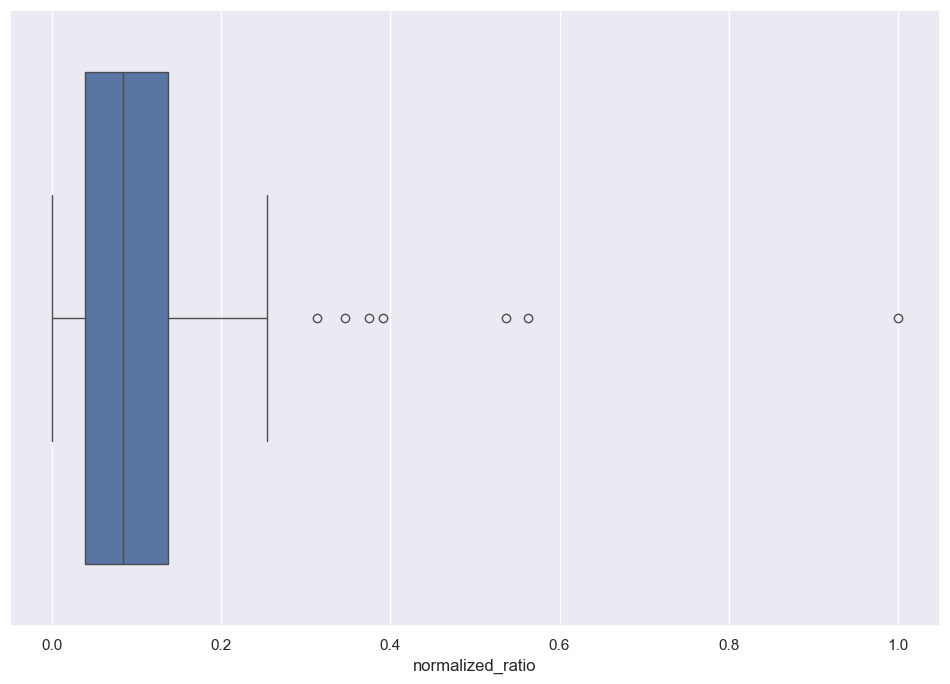

In [21]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.boxplot(df_unpaid_care_work['normalized_ratio'],orient='h')

C:\Users\HP\AppData\Local\Temp\ipykernel_21236\3321398621.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_unpaid_care_work.sort_values(by = ['normalized_ratio'],ascending=False), x="Entity", y="normalized_ratio",palette='dark'


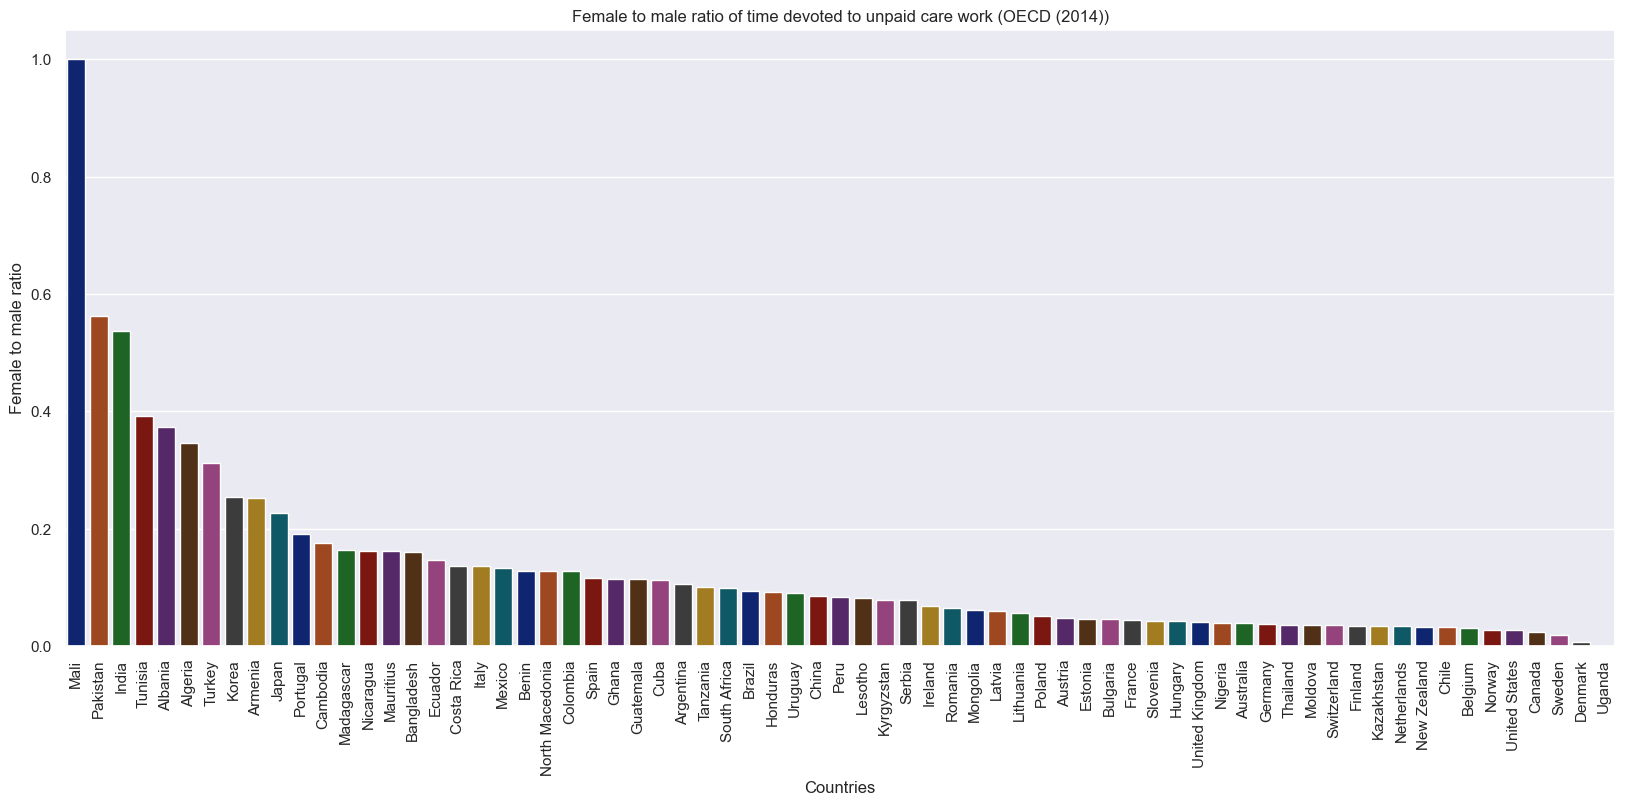

In [22]:
plt.figure(figsize=(20,8))
plt.title('Female to male ratio of time devoted to unpaid care work (OECD (2014))')
plt.ylabel('Female to male ratio')
plt.xlabel('Countries')
plt.xticks(rotation=90)
sns.barplot(data=df_unpaid_care_work.sort_values(by = ['normalized_ratio'],ascending=False), x="Entity", y="normalized_ratio",palette='dark'
            
)
plt.show()

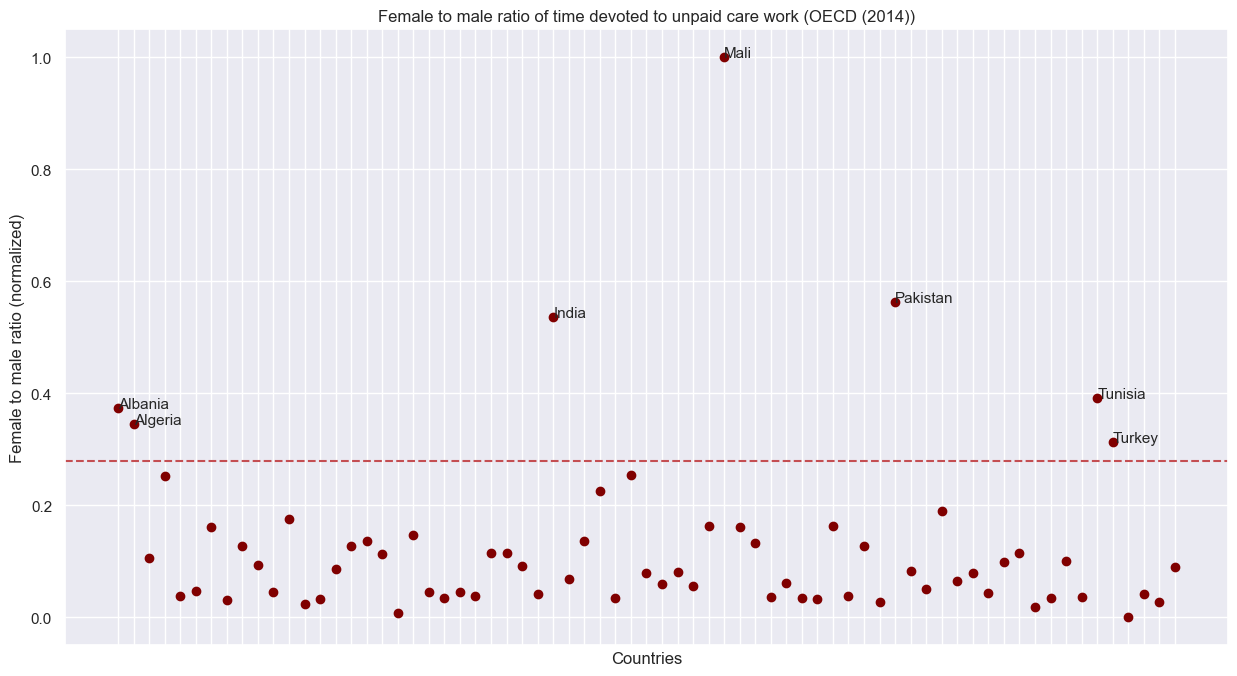

In [23]:
plt.figure(figsize=(15,8))
plt.title('Female to male ratio of time devoted to unpaid care work (OECD (2014))')
plt.ylabel('Female to male ratio (normalized)')
plt.xlabel('Countries')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)
plt.axhline(y=0.28, color='r', linestyle='--')
for i in range(len(df_unpaid_care_work)):
    x = df_unpaid_care_work['Entity'][i]
    y = df_unpaid_care_work['normalized_ratio'][i]
    plt.plot(x, y, "o", color="maroon")
    if df_unpaid_care_work['normalized_ratio'][i] >= 0.28:
        plt.text(x, y * (1 - 0.00005), df_unpaid_care_work['Entity'][i], fontsize=11)
  
plt.show()

## Maternal Mortality Dataset

 - The World Health Organization defines maternal death as the death of a pregnant mother due to complications related to pregnancy, underlying conditions worsened by the pregnancy or management of these conditions
 - Maternal Mortality Ratio — which is a ratio comparing the number of pregnancy-related deaths to the number of births in the same period
 - https://ourworldindata.org/maternal-mortality
 - [Maternal mortality declined by 34 per cent between 2000 and 2020](https://data.unicef.org/topic/maternal-health/maternal-mortality/)
 - Year : 1750-2020 (Most of the data after 2000)
 - 200 Countries

In [24]:
df_maternal_mortality = read_csv('data/5-maternal-mortality.csv')

In [25]:
df_maternal_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 4 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Entity                                                             5800 non-null   object 
 1   Code                                                               5548 non-null   object 
 2   Year                                                               5800 non-null   int64  
 3   Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))  5800 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 181.4+ KB


In [26]:
df_maternal_mortality.head()

,Entity,Code,Year,Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))
0,Afghanistan,AFG,2000,1450.0
1,Afghanistan,AFG,2001,1390.0
2,Afghanistan,AFG,2002,1300.0
3,Afghanistan,AFG,2003,1240.0
4,Afghanistan,AFG,2004,1180.0


In [27]:
df_maternal_mortality.query('Year == 2014')


,Entity,Code,Year,Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))
14,Afghanistan,AFG,2014,786.0
32,Albania,ALB,2014,16.0
50,Algeria,DZA,2014,114.0
68,Angola,AGO,2014,258.0
86,Antigua and Barbuda,ATG,2014,42.0
...,...,...,...,...
5724,Vietnam,VNM,2014,45.0
5742,World,OWID_WRL,2014,224.0
5760,Yemen,YEM,2014,174.0
5778,Zambia,ZMB,2014,242.0


In [28]:
# Changing the column name for readability
df_maternal_mortality = df_maternal_mortality.rename(columns={"Maternal Mortality Ratio (Gapminder (2010) and World Bank (2015))": "maternal_mortality_ratio"})

In [29]:
# There are null values in Code
# But Code is not really important
is_null(df_maternal_mortality)

Code                        252
Entity                        0
Year                          0
maternal_mortality_ratio      0
dtype: int64

In [30]:
df_maternal_mortality['maternal_mortality_ratio_normalized'] = min_max_norm(df_maternal_mortality,'maternal_mortality_ratio')

In [31]:
df_maternal_mortality.describe()

,Year,maternal_mortality_ratio,maternal_mortality_ratio_normalized
count,5800.000000,5800.000000,5800.000000
mean,1983.856897,216.928822,0.087471
std,48.513327,297.109363,0.119802
min,1751.000000,0.000000,0.000000
25%,1979.000000,13.000000,0.005242
50%,2003.000000,61.185000,0.024671
75%,2011.000000,356.000000,0.143548
max,2020.000000,2480.000000,1.000000


<Axes: xlabel='maternal_mortality_ratio_normalized'>

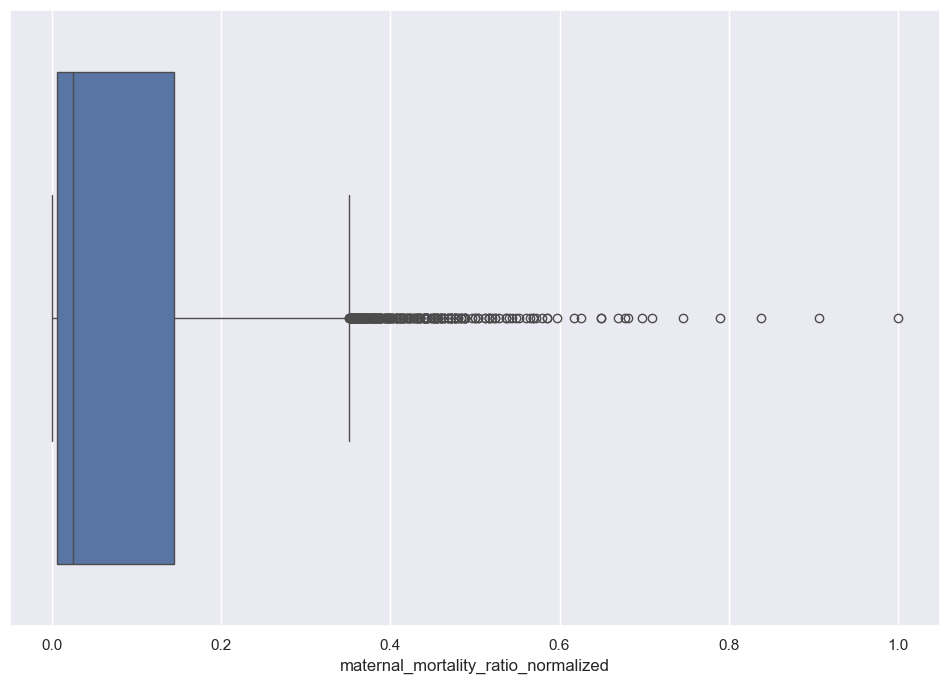

In [32]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.boxplot(df_maternal_mortality['maternal_mortality_ratio_normalized'],orient='h')

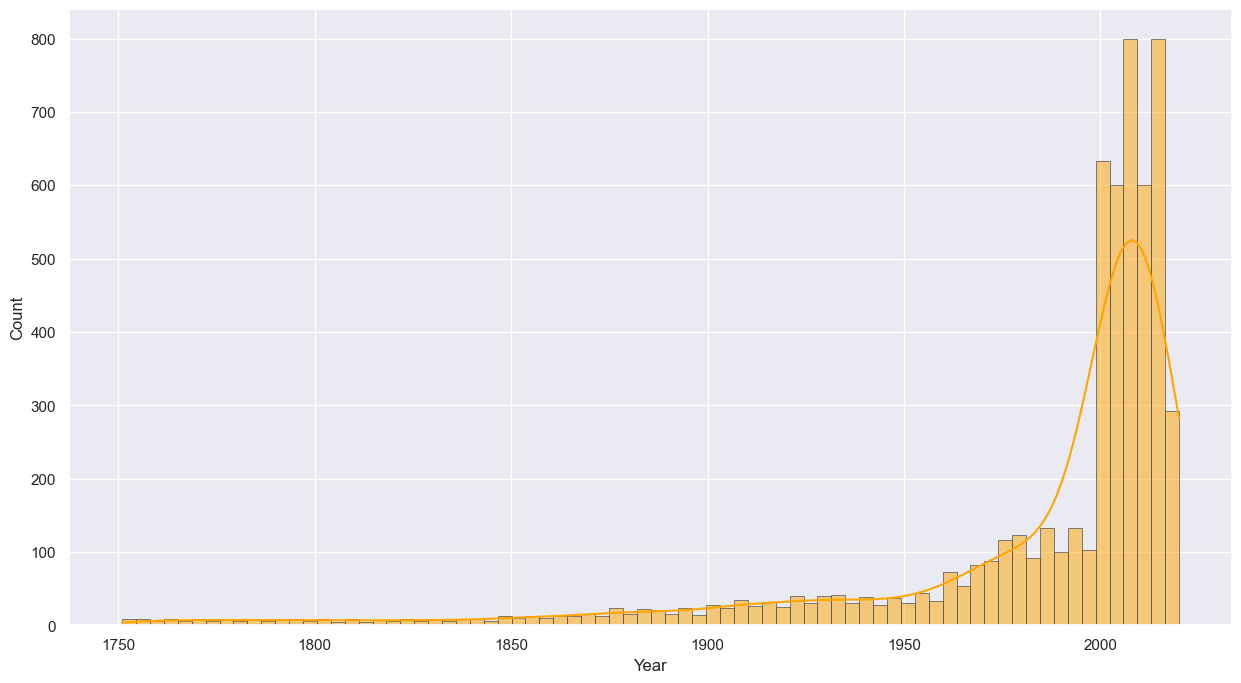

In [33]:
plt.figure(figsize=(15,8))
plt.title('')
plt.ylabel('Count')
plt.xlabel('Year')
sns.histplot(data = df_maternal_mortality, x = 'Year',   kde = True,
             color='orange',
                 multiple="stack",
                edgecolor=".3",
                linewidth=.5,
     )
plt.show()

In [34]:
outlier_thresholds(df_maternal_mortality,'maternal_mortality_ratio_normalized')

(-0.5080128024193548, 0.8499138104838708)

In [35]:
df_maternal_mortality['Entity'].value_counts()

Entity
Sweden              270
Finland             267
United Kingdom      171
Belgium             148
New Zealand         140
                   ... 
High income (WB)     18
Honduras             18
India                18
Indonesia            18
Zimbabwe             18
Name: count, Length: 200, dtype: int64

In [36]:
df_maternal_mortality_after_2010 = df_maternal_mortality.query('Year >= 2010')

C:\Users\HP\AppData\Local\Temp\ipykernel_21236\2218191826.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_maternal_mortality_after_2010[['Entity','maternal_mortality_ratio_normalized']].groupby(by='Entity').mean().sort_values(by = ['maternal_mortality_ratio_normalized'],ascending=False),


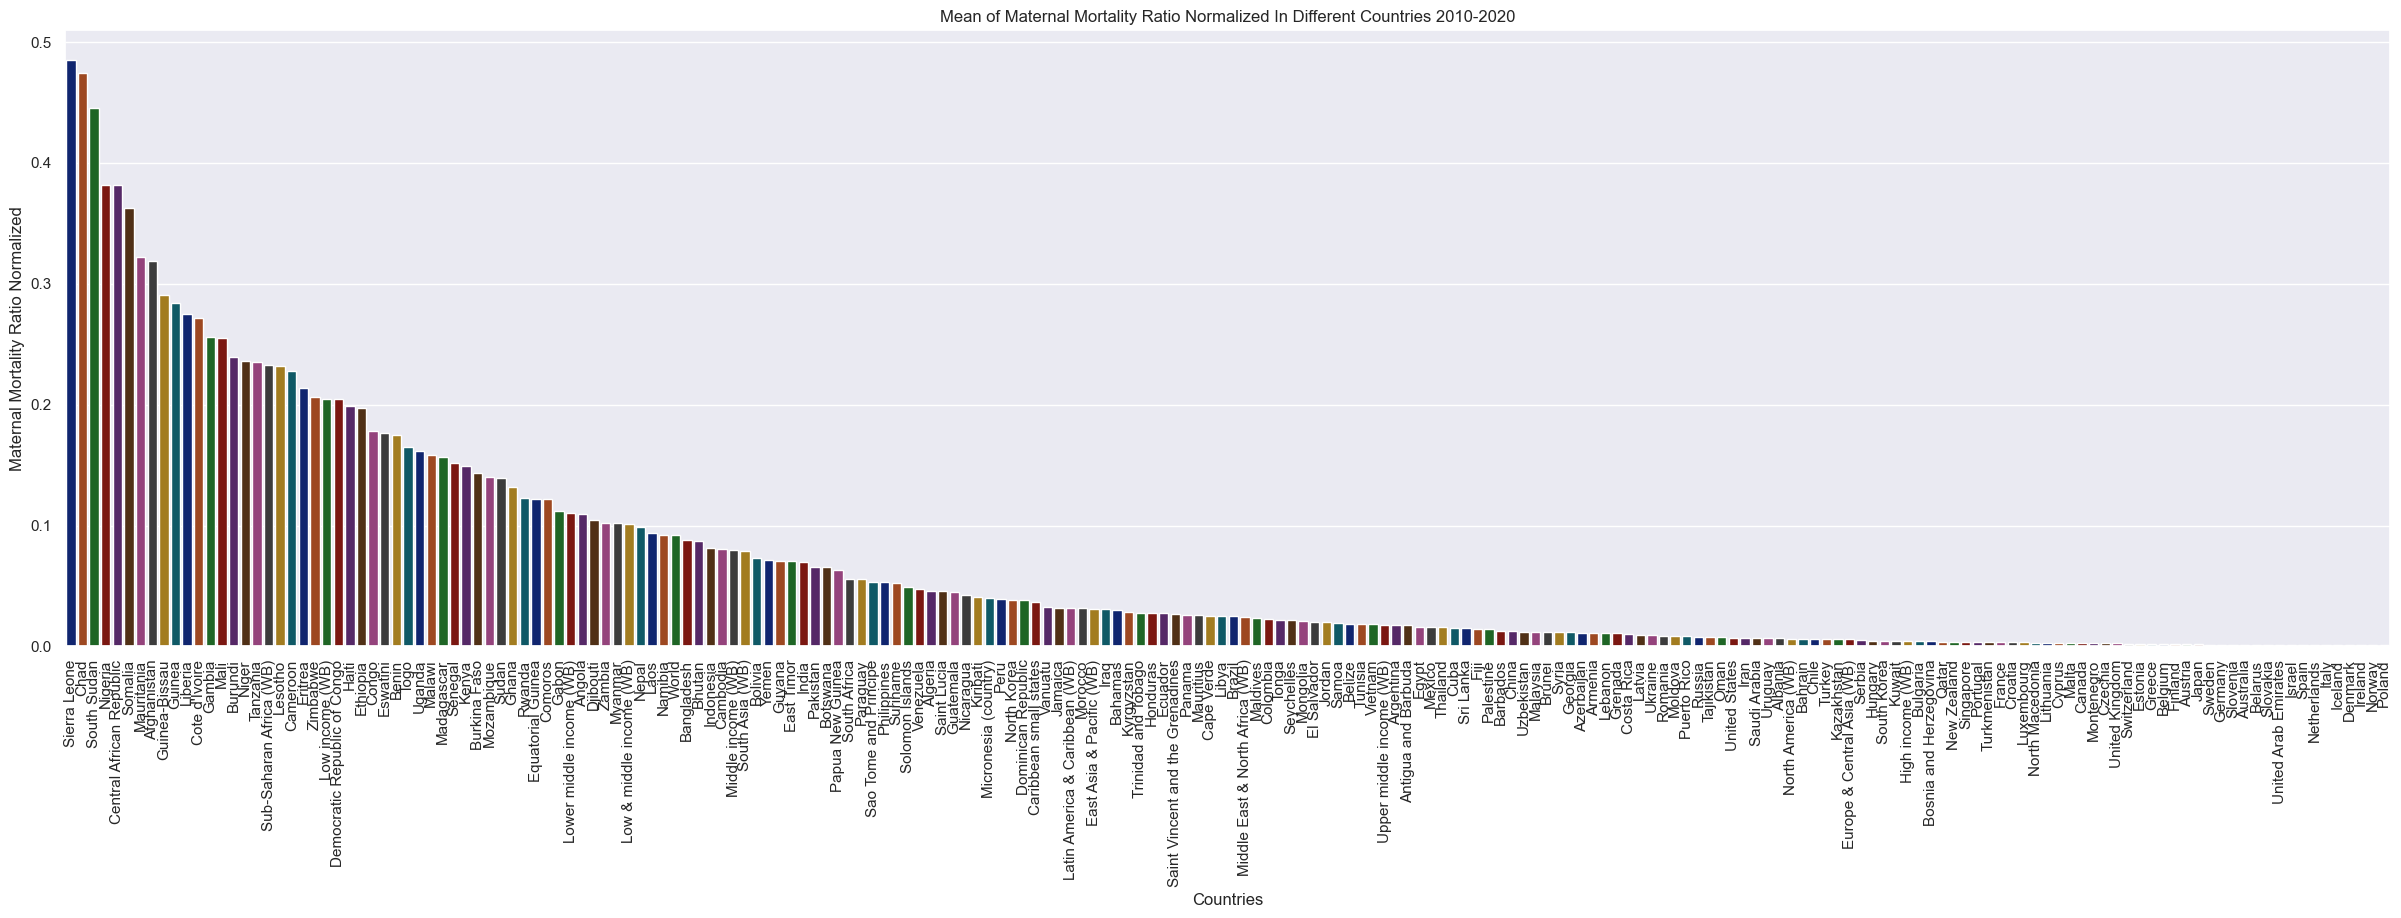

In [37]:
plt.figure(figsize=(30,8))
plt.title('Mean of Maternal Mortality Ratio Normalized In Different Countries 2010-2020')
plt.ylabel('Maternal Mortality Ratio Normalized')
plt.xlabel('Countries')
plt.xticks(rotation=90)
sns.barplot(data=df_maternal_mortality_after_2010[['Entity','maternal_mortality_ratio_normalized']].groupby(by='Entity').mean().sort_values(by = ['maternal_mortality_ratio_normalized'],ascending=False),
             x="Entity",
            y="maternal_mortality_ratio_normalized",
            palette='dark',
            
)
plt.show()

In [38]:
df_maternal_mortality_after_2010[['Entity','maternal_mortality_ratio_normalized']].groupby(by='Entity').mean()['maternal_mortality_ratio_normalized'].iloc[i]

0.0019879032258064517

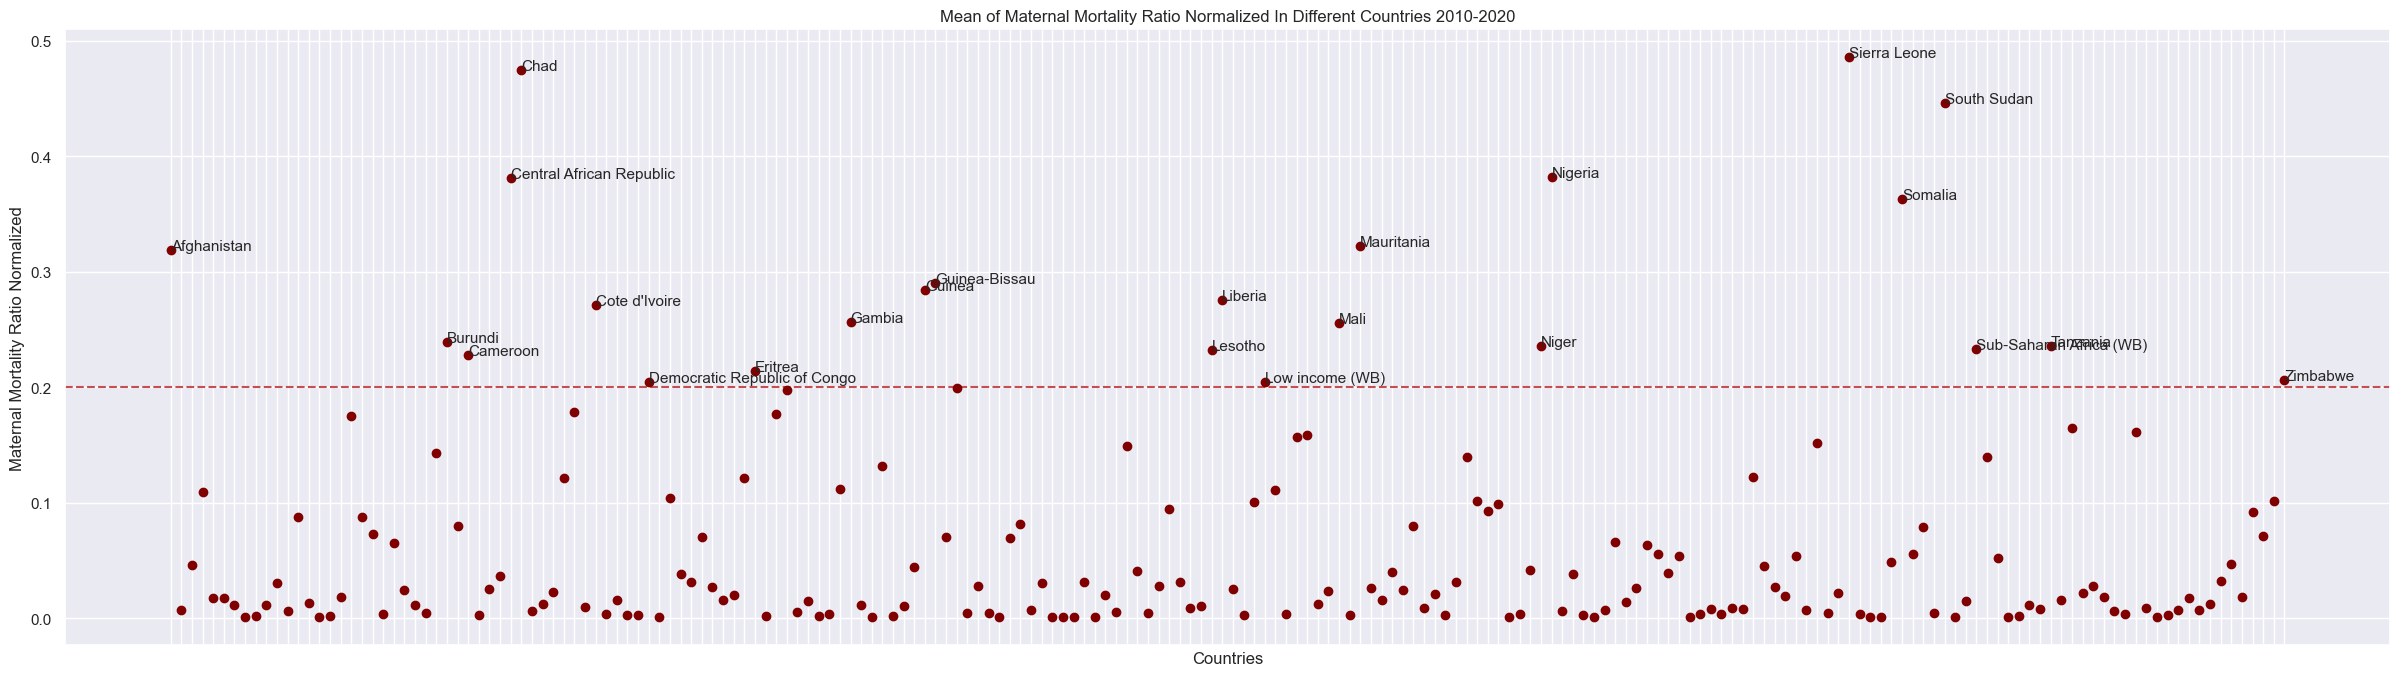

In [39]:
plt.figure(figsize=(30,8))
plt.title('Mean of Maternal Mortality Ratio Normalized In Different Countries 2010-2020')
plt.ylabel('Maternal Mortality Ratio Normalized')
plt.xlabel('Countries')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)
plt.axhline(y=0.2, color='r', linestyle='--')
for i in range(len(df_maternal_mortality_after_2010[['Entity','maternal_mortality_ratio_normalized']].groupby(by='Entity').mean())):
    x = df_maternal_mortality_after_2010[['Entity','maternal_mortality_ratio_normalized']].groupby(by='Entity').mean().index[i]
    y = df_maternal_mortality_after_2010[['Entity','maternal_mortality_ratio_normalized']].groupby(by='Entity').mean()['maternal_mortality_ratio_normalized'].iloc[i]
    plt.plot(x, y, "o", color="maroon")
    if df_maternal_mortality_after_2010[['Entity','maternal_mortality_ratio_normalized']].groupby(by='Entity').mean()['maternal_mortality_ratio_normalized'].iloc[i] >= 0.2:
        plt.text(x, y * (1 - 0.00005), df_maternal_mortality_after_2010[['Entity','maternal_mortality_ratio_normalized']].groupby(by='Entity').mean().index[i], fontsize=11)
  
plt.show()

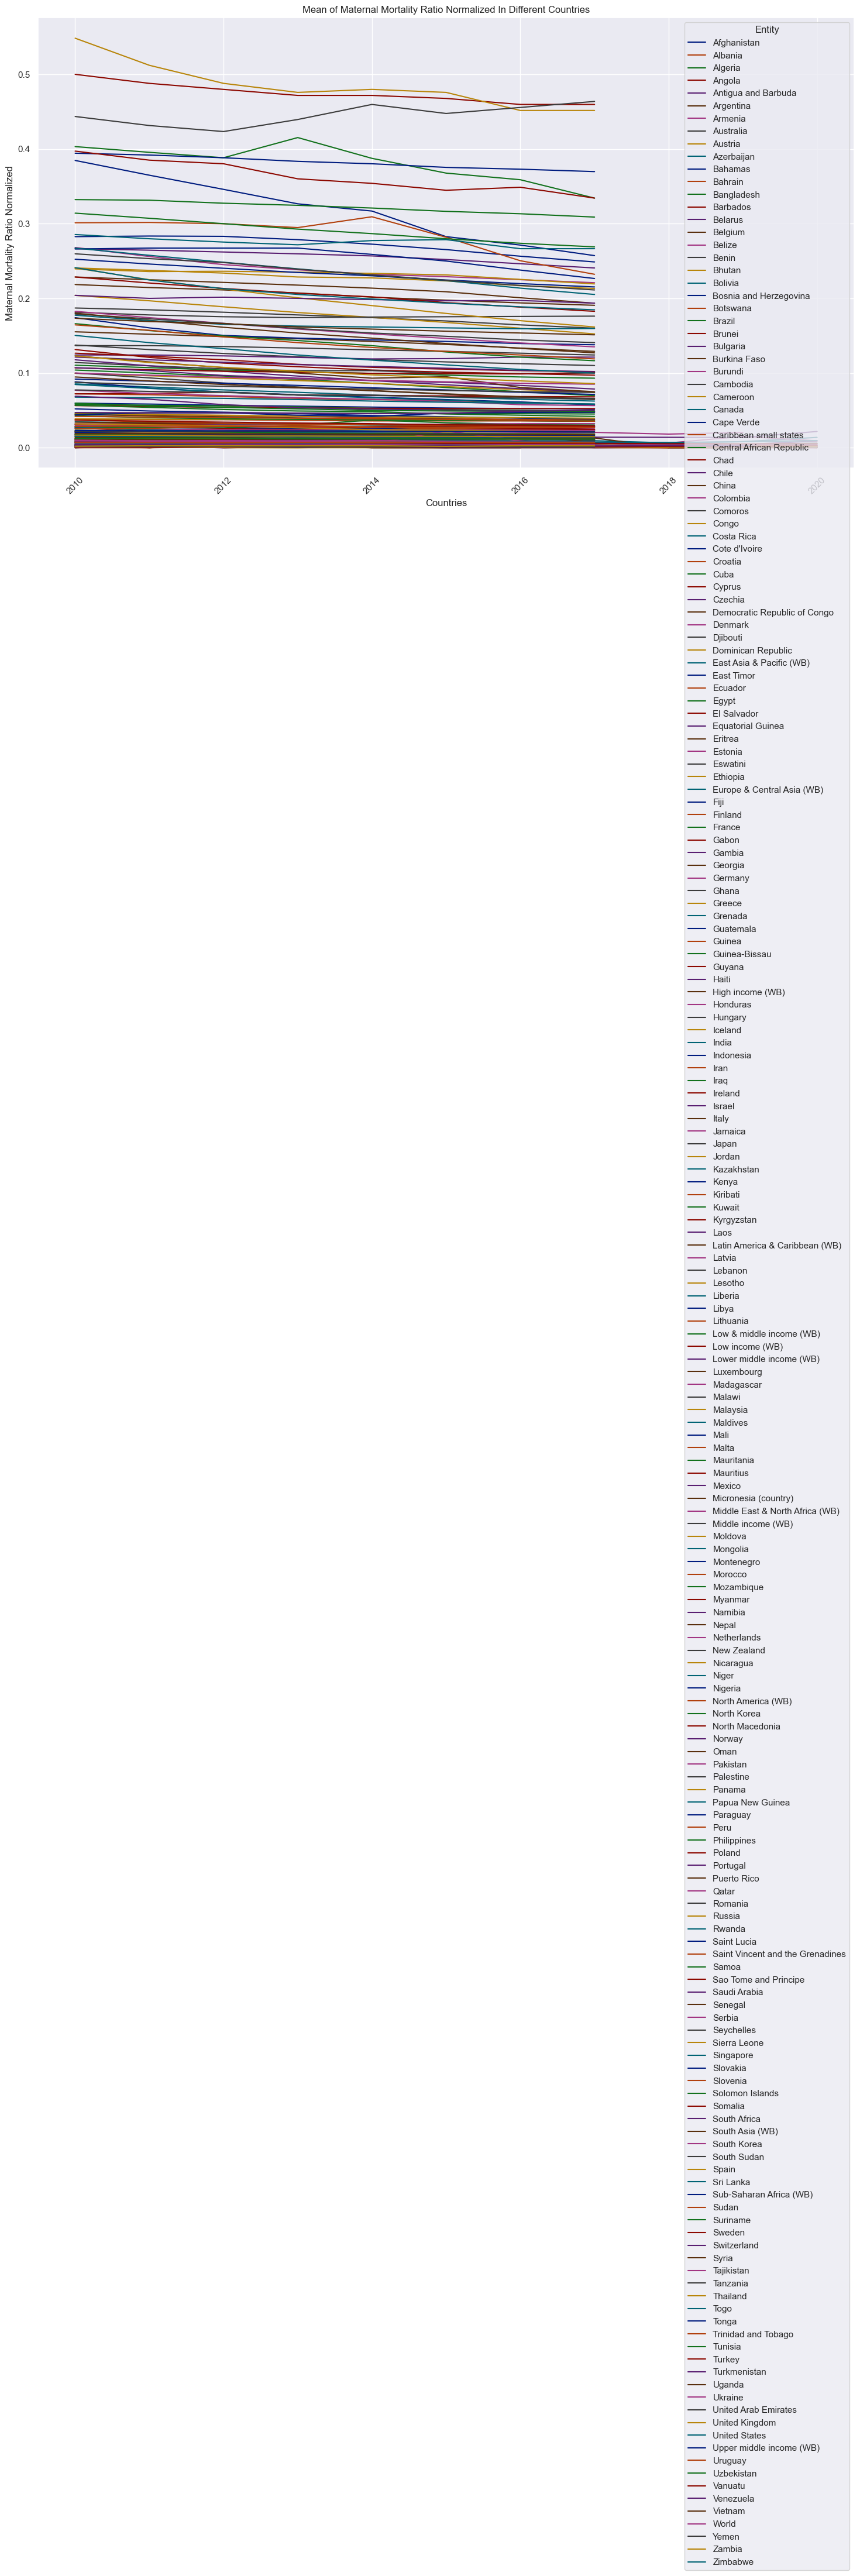

In [40]:
plt.figure(figsize=(18,10))
plt.title('Mean of Maternal Mortality Ratio Normalized In Different Countries')
plt.ylabel('Maternal Mortality Ratio Normalized')
plt.xlabel('Countries')
plt.xticks(rotation=45)
sns.lineplot(data=df_maternal_mortality.query('Year >= 2010'), y="maternal_mortality_ratio_normalized", x="Year",
             hue='Entity',palette='dark'
             
)
plt.show()

<Axes: xlabel='Year'>

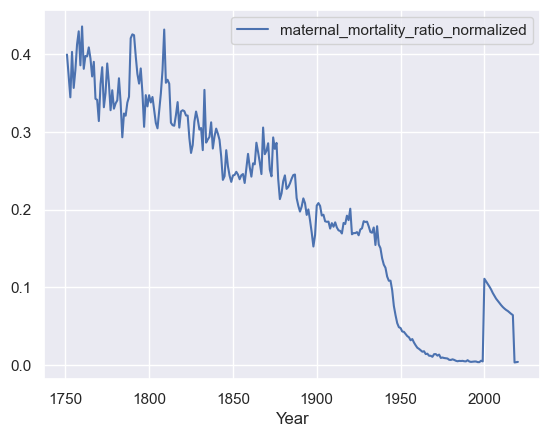

In [41]:
df_maternal_mortality[['Year','maternal_mortality_ratio_normalized']].groupby(by='Year').mean().plot()

## Income datasets

- Percentage of individuals falling into top income brackets that are women
- https://ourworldindata.org/grapher/share-of-women-in-top-income-groups-atkinson-casarico-voitchovsky-2018


In [42]:
df_income = read_csv('data/2-share-of-women-in-top-income-groups.csv')

- Year : 1980-2015
- 8 Countries

In [43]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       168 non-null    object 
 1   Code                         148 non-null    object 
 2   Year                         168 non-null    int64  
 3   Share of women in top 0.1%   131 non-null    float64
 4   Share of women in top 0.25%  37 non-null     float64
 5   Share of women in top 0.5%   82 non-null     float64
 6   Share of women in top 1%     167 non-null    float64
 7   Share of women in top 10%    168 non-null    float64
 8   Share of women in top 5%     168 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.9+ KB


In [44]:
df_income.describe()

,Year,Share of women in top 0.1%,Share of women in top 0.25%,Share of women in top 0.5%,Share of women in top 1%,Share of women in top 10%,Share of women in top 5%
count,168.000000,131.00000,37.000000,82.000000,167.000000,168.000000,168.000000
mean,2002.202381,11.91374,12.835135,14.731707,15.690419,24.381548,20.511905
std,8.969382,3.27524,1.506876,2.942363,4.361071,5.352694,5.070341
min,1980.000000,4.60000,9.900000,7.300000,4.500000,9.400000,6.900000
25%,1997.000000,9.90000,11.500000,12.600000,13.450000,21.475000,17.700000
50%,2004.000000,11.80000,13.200000,14.600000,16.200000,25.400000,21.700000
75%,2009.000000,13.70000,13.500000,16.300000,18.600000,28.525000,24.200000
max,2015.000000,20.00000,16.000000,22.600000,25.000000,34.800000,33.200000


In [45]:
df_income.head()

,Entity,Code,Year,Share of women in top 0.1%,Share of women in top 0.25%,Share of women in top 0.5%,Share of women in top 1%,Share of women in top 10%,Share of women in top 5%
0,Australia,AUS,2000,14.2,NaN,NaN,18.3,24.9,21.1
1,Australia,AUS,2001,13.2,NaN,NaN,18.4,25.1,21.4
2,Australia,AUS,2002,13.5,NaN,NaN,18.8,25.1,21.5
3,Australia,AUS,2003,14.4,NaN,NaN,19.1,25.1,21.6
4,Australia,AUS,2004,15.2,NaN,NaN,19.6,25.5,22.2


In [46]:
df_income.nunique()

Entity                           8
Code                             7
Year                            36
Share of women in top 0.1%      76
Share of women in top 0.25%     29
Share of women in top 0.5%      54
Share of women in top 1%       100
Share of women in top 10%      106
Share of women in top 5%       101
dtype: int64

In [47]:
is_null(df_income)

Share of women in top 0.25%    131
Share of women in top 0.5%      86
Share of women in top 0.1%      37
Code                            20
Share of women in top 1%         1
Entity                           0
Year                             0
Share of women in top 10%        0
Share of women in top 5%         0
dtype: int64

In [48]:
df_income = df_income.rename(columns=
    {
"Share of women in top 0.25%": "share_of_women_top_0.25%",   
"Share of women in top 0.5%" : "share_of_women_top_0.5%",      
"Share of women in top 0.1%" : "share_of_women_top_0.1%",    
"Share of women in top 1%"   : "share_of_women_top_1%",       
"Share of women in top 10%"  : "share_of_women_top_10%",      
"Share of women in top 5%"   : "share_of_women_top_5%"})

In [50]:
df_income.columns

Index(['Entity', 'Code', 'Year', 'share_of_women_top_0.1%',
       'share_of_women_top_0.25%', 'share_of_women_top_0.5%',
       'share_of_women_top_1%', 'share_of_women_top_10%',
       'share_of_women_top_5%'],
      dtype='object')

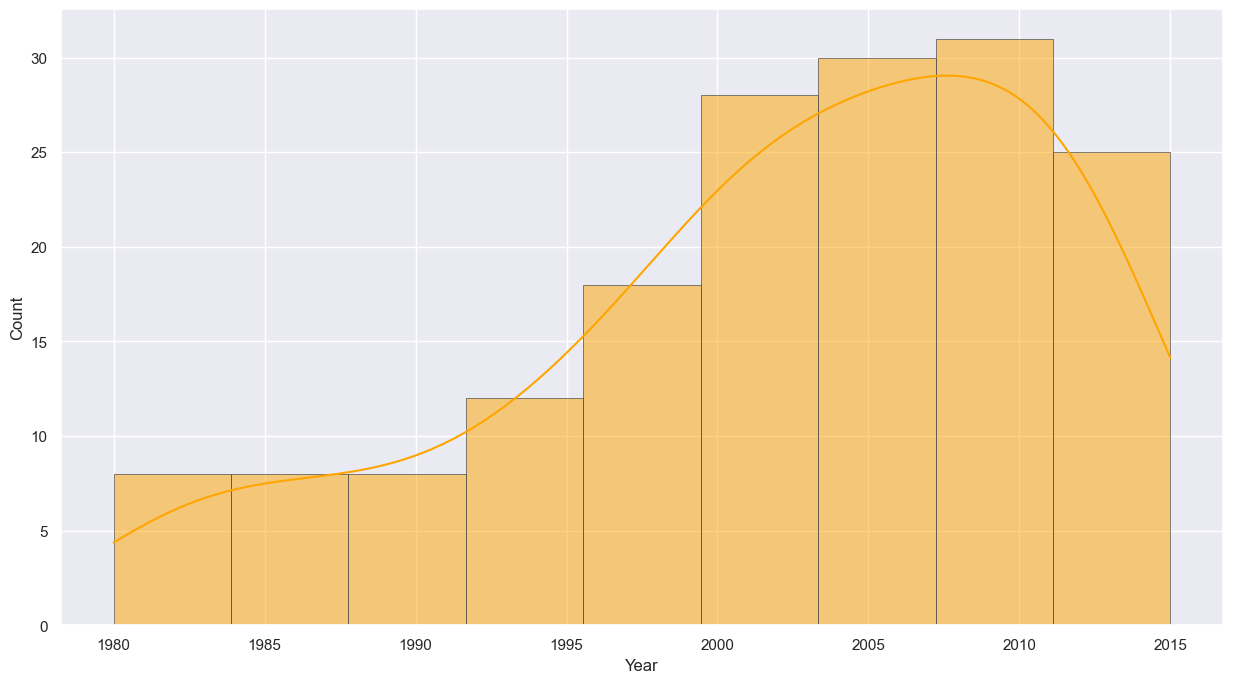

In [51]:
plt.figure(figsize=(15,8))
plt.title('')
plt.ylabel('Count')
plt.xlabel('Year')
sns.histplot(data = df_income, x = 'Year',   kde = True,
             color='orange',
                 multiple="stack",
                edgecolor=".3",
                linewidth=.5,
     )
plt.show()

In [52]:
df_income[~df_income['share_of_women_top_0.1%'].isnull()]

,Entity,Code,Year,share_of_women_top_0.1%,share_of_women_top_0.25%,share_of_women_top_0.5%,share_of_women_top_1%,share_of_women_top_10%,share_of_women_top_5%
0,Australia,AUS,2000,14.2,NaN,NaN,18.3,24.9,21.1
1,Australia,AUS,2001,13.2,NaN,NaN,18.4,25.1,21.4
2,Australia,AUS,2002,13.5,NaN,NaN,18.8,25.1,21.5
3,Australia,AUS,2003,14.4,NaN,NaN,19.1,25.1,21.6
4,Australia,AUS,2004,15.2,NaN,NaN,19.6,25.5,22.2
...,...,...,...,...,...,...,...,...,...
163,UK,NaN,2011,9.9,12.2,14.4,17.1,28.1,24.2
164,UK,NaN,2012,11.9,13.5,15.4,17.7,28.0,24.2
165,UK,NaN,2013,10.8,13.3,15.6,18.0,28.0,24.6
166,UK,NaN,2014,11.4,13.9,16.3,18.6,27.7,24.8


In [53]:
## Filling null values with regression

In [54]:
df_income.groupby(by='Entity').count()

,Code,Year,share_of_women_top_0.1%,share_of_women_top_0.25%,share_of_women_top_0.5%,share_of_women_top_1%,share_of_women_top_10%,share_of_women_top_5%
Entity,,,,,,,,
Australia,15,15,14,0,0,15,15,15
Canada,23,23,23,0,0,23,23,23
Denmark,34,34,34,0,0,34,34,34
Italy,17,17,17,17,17,17,17,17
New Zealand,36,36,0,0,22,35,36,36
Norway,8,8,8,0,8,8,8,8
Spain,15,15,15,0,15,15,15,15
UK,0,20,20,20,20,20,20,20


- The gender wage gap is defined as the difference between median earnings of men and women relative to median earnings of men.
- Year: 1981-2016
- 64 Countries

In [55]:
df_gender_gap_wage = read_csv('data/6-gender-gap-in-average-wages-ilo.csv')

In [56]:
df_gender_gap_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               413 non-null    object 
 1   Code                 413 non-null    object 
 2   Year                 413 non-null    int64  
 3   Gender wage gap (%)  413 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 13.0+ KB


In [57]:
df_gender_gap_wage = df_gender_gap_wage.rename(columns={"Gender wage gap (%)": "gender_wage_gape_percent"})

In [58]:
df_gender_gap_wage.head()

,Entity,Code,Year,gender_wage_gape_percent
0,Argentina,ARG,1986,15.79
1,Argentina,ARG,1987,12.50
2,Argentina,ARG,1988,11.31
3,Argentina,ARG,1991,6.71
4,Argentina,ARG,1992,8.33


In [59]:
df_gender_gap_wage.describe()

,Year,gender_wage_gape_percent
count,413.000000,413.000000
mean,2005.159806,10.886949
std,7.820724,10.241873
min,1981.000000,-28.270000
25%,2000.000000,3.920000
50%,2006.000000,10.680000
75%,2012.000000,17.630000
max,2016.000000,35.750000


In [60]:
df_gender_gap_wage.nunique()

Entity                       64
Code                         64
Year                         36
gender_wage_gape_percent    352
dtype: int64

<Axes: xlabel='gender_wage_gape_percent'>

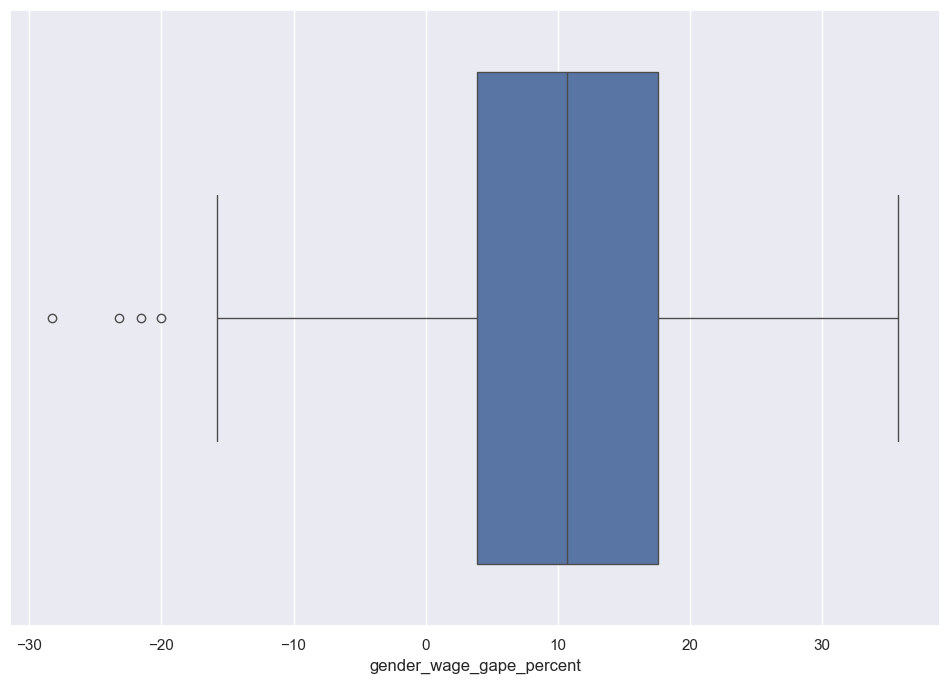

In [61]:
plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.boxplot(df_gender_gap_wage['gender_wage_gape_percent'],orient='h')

<Axes: xlabel='Year', ylabel='gender_wage_gape_percent'>

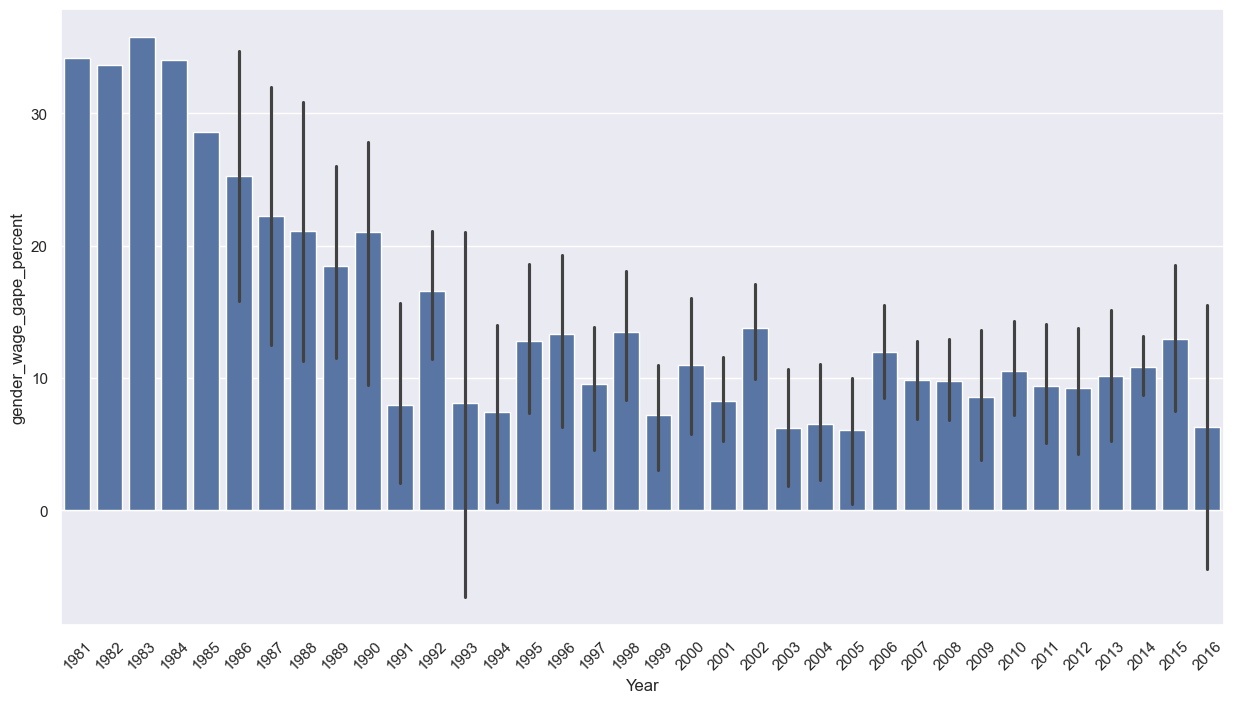

In [62]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
plt.xticks(rotation=45)
sns.barplot(df_gender_gap_wage, x="Year", y="gender_wage_gape_percent")



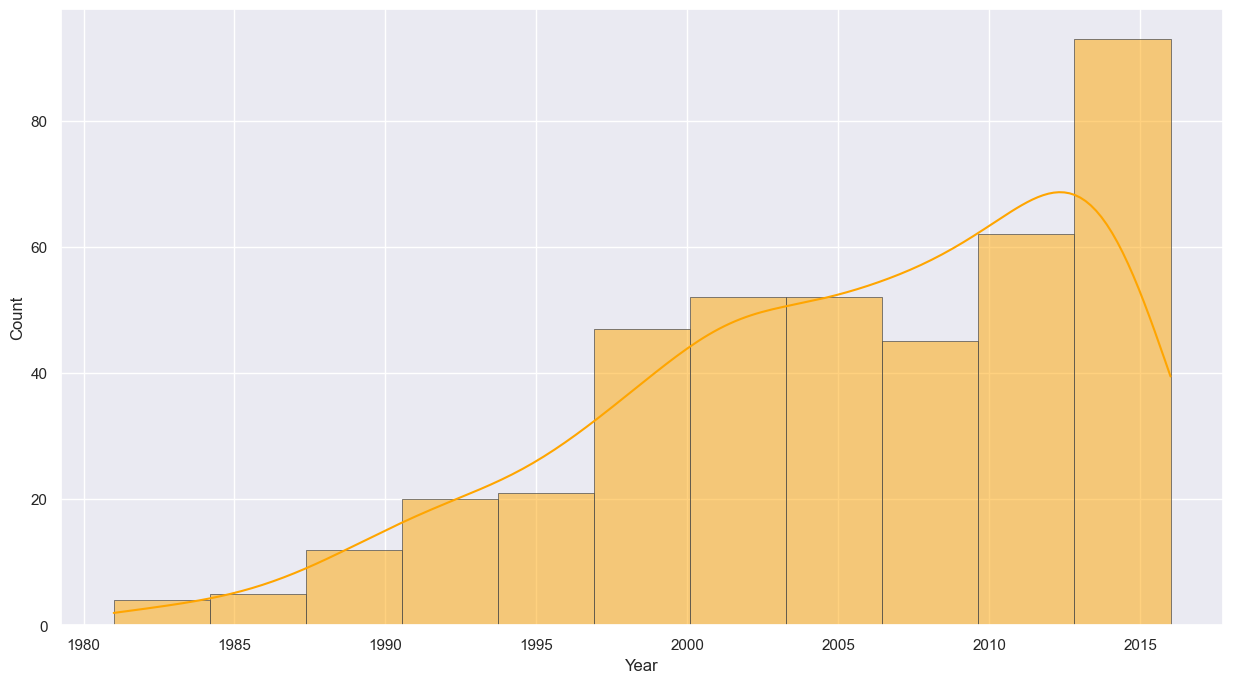

In [63]:
plt.figure(figsize=(15,8))
plt.title('')
plt.ylabel('Count')
plt.xlabel('Year')
sns.histplot(data = df_gender_gap_wage, x = 'Year',   kde = True,
             color='orange',
                 multiple="stack",
                edgecolor=".3",
                linewidth=.5,
     )
plt.show()

In [64]:
df_gender_gap_wage.groupby(by='Year').count()

,Entity,Code,gender_wage_gape_percent
Year,,,
1981,1,1,1
1982,1,1,1
1983,1,1,1
1984,1,1,1
1985,1,1,1
1986,2,2,2
1987,2,2,2
1988,2,2,2
1989,6,6,6


In [65]:
df_gender_gap_wage.groupby(by='Entity').count()

,Code,Year,gender_wage_gape_percent
Entity,,,
Argentina,27,27,27
Austria,4,4,4
Belgium,4,4,4
Belize,6,6,6
Bolivia,15,15,15
...,...,...,...
Turkey,1,1,1
United Kingdom,2,2,2
Uruguay,21,21,21


## Labor datasets

- The labor force is the number of people who are employed plus the unemployed who are looking for work.
- At its most basic level, entrepreneurship refers to an individual or a small group of partners who strike out on an original path to create a new business.

- The labor force participation rate is the proportion of the population aged
15 years and older that is economically active.
- This ratio is calculated by dividing the labor force participation rate among women, by the
corresponding rate for men. 
- https://ourworldindata.org/grapher/ratio-of-female-to-male-labor-force-participation-rates-ilo-wdi

In [66]:
df_ratio_labor = read_csv('data/3-ratio-of-female-to-male-labor-force-participation-rates-ilo-wdi.csv')

In [67]:
df_ratio_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6432 entries, 0 to 6431
Data columns (total 4 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6432 non-null   object 
 1   Code                                                                               5984 non-null   object 
 2   Year                                                                               6432 non-null   int64  
 3   Ratio of female to male labor force participation rate (%) (modeled ILO estimate)  6432 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 201.1+ KB


In [68]:
df_ratio_labor = df_ratio_labor.rename(columns={"Ratio of female to male labor force participation rate (%) (modeled ILO estimate)": "ratio_of_f_to_m_labor_force_participation_rate"})

In [69]:
df_ratio_labor.head()

,Entity,Code,Year,ratio_of_f_to_m_labor_force_participation_rate
0,Afghanistan,AFG,1990,19.604805
1,Afghanistan,AFG,1991,19.713380
2,Afghanistan,AFG,1992,19.803307
3,Afghanistan,AFG,1993,19.844606
4,Afghanistan,AFG,1994,19.884710


In [70]:
df_ratio_labor.groupby(by="Entity").count()

,Code,Year,ratio_of_f_to_m_labor_force_participation_rate
Entity,,,
Afghanistan,32,32,32
Albania,32,32,32
Algeria,32,32,32
Angola,32,32,32
Argentina,32,32,32
...,...,...,...
West Bank and Gaza,0,32,32
World,32,32,32
Yemen,32,32,32


In [71]:
df_ratio_labor.groupby(by="Year").count()

,Entity,Code,ratio_of_f_to_m_labor_force_participation_rate
Year,,,
1990,201,187,201
1991,201,187,201
1992,201,187,201
1993,201,187,201
1994,201,187,201
1995,201,187,201
1996,201,187,201
1997,201,187,201
1998,201,187,201


In [72]:
df_labor_entp =pd.read_csv('data/Labor-Force-Women-Entrpreneurship.csv',sep=';')

In [73]:
df_ent = pd.read_csv('data\Women-Ent_Data3.csv',sep=';')

In [74]:
df_ent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


In [75]:
df_labor_entp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


In [76]:
# df_ent and df_labor_entp are the same
(df_ent == df_labor_entp).all()

No                                       True
Country                                  True
Level of development                     True
European Union Membership                True
Currency                                 True
Women Entrepreneurship Index             True
Entrepreneurship Index                   True
Inflation rate                           True
Female Labor Force Participation Rate    True
dtype: bool

In [77]:
# Deleting one of the datasets
del df_ent

In [78]:
df_labor_entp.columns = [col.replace(' ','_') for col in df_labor_entp.columns]

In [79]:
df_labor_entp.head()

,No,Country,Level_of_development,European_Union_Membership,Currency,Women_Entrepreneurship_Index,Entrepreneurship_Index,Inflation_rate,Female_Labor_Force_Participation_Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


- Level of development: countries based on their level of development

- European Union Membership: whether the country is a member of the European Union (EU) or not

- Currency: This column likely specifies the currency used in each country

- Women Entrepreneurship Index: Women Entrepreneurship Index (WEI) for each country. It quantifies the conditions favorable or unfavorable for female entrepreneurs within each country. The values are typically between 0 and 100, with higher values indicating a more favorable environment for women entrepreneurs.

- Entrepreneurship Index: Entrepreneurship Index (EI) for each country. It assesses the overall entrepreneurial environment within each country, regardless of gender. Similar to the Women Entrepreneurship Index, the values are typically between 0 and 100, with higher values indicating a more favorable environment for entrepreneurship.

- Inflation rate: inflation rate for each country. Inflation rate measures the percentage change in the general price level of goods and services over a period of time. 

- Female Labor Force Participation Rate: percentage of women who are actively participating in the labor force within each country. It measures the proportion of women who are either employed or actively seeking employment. 

In [80]:
df_labor_entp.describe()

,No,Women_Entrepreneurship_Index,Entrepreneurship_Index,Inflation_rate,Female_Labor_Force_Participation_Rate
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,29.980392,47.835294,47.241176,2.587647,58.481765
std,18.017203,14.268480,16.193149,5.380639,13.864567
min,1.000000,25.300000,24.800000,-2.250000,13.000000
25%,14.500000,36.350000,31.900000,-0.500000,55.800000
50%,30.000000,44.500000,42.700000,0.600000,61.000000
75%,45.500000,59.150000,65.400000,3.600000,67.400000
max,60.000000,74.800000,77.600000,26.500000,82.300000


In [81]:
df_labor_entp.nunique()

No                                       51
Country                                  51
Level_of_development                      2
European_Union_Membership                 2
Currency                                  2
Women_Entrepreneurship_Index             50
Entrepreneurship_Index                   49
Inflation_rate                           37
Female_Labor_Force_Participation_Rate    48
dtype: int64

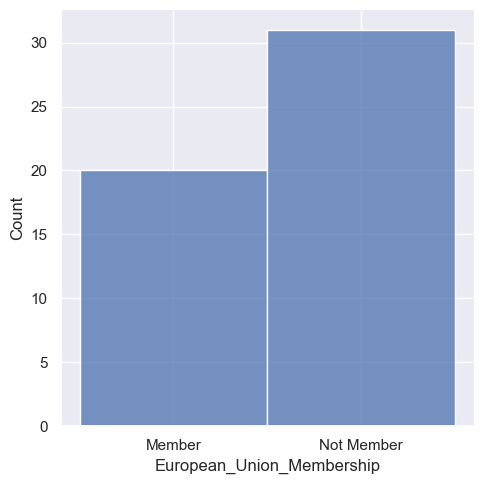

In [82]:
sns.displot(df_labor_entp, x="European_Union_Membership")


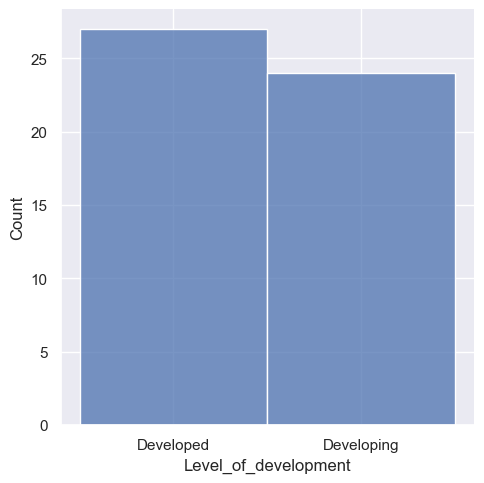

In [83]:
sns.displot(df_labor_entp, x="Level_of_development")


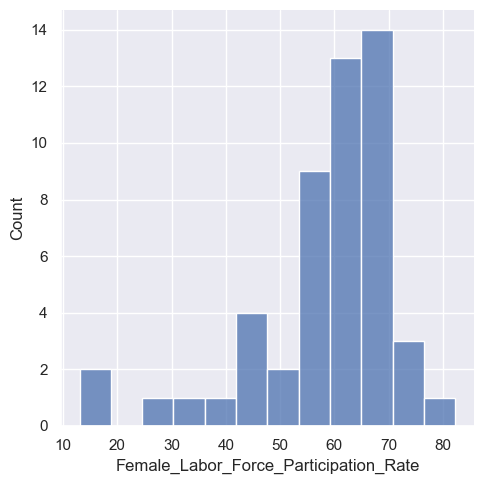

In [84]:
sns.displot(df_labor_entp, x="Female_Labor_Force_Participation_Rate")

In [85]:
df_labour_female = read_csv('data\Labour-Force-Participation-Female.csv')

In [86]:
df_labour_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 37 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   ISO3                                                                  195 non-null    object 
 1   Country                                                               195 non-null    object 
 2   Continent                                                             195 non-null    object 
 3   Hemisphere                                                            195 non-null    object 
 4   HDI Rank (2021)                                                       191 non-null    float64
 5   Labour force participation rate, female (% ages 15 and older) (1990)  180 non-null    float64
 6   Labour force participation rate, female (% ages 15 and older) (1991)  180 non-null    float64
 7  

In [87]:
# Extract year as a feauture
df_labour_female.head()

,ISO3,Country,Continent,Hemisphere,HDI Rank (2021),"Labour force participation rate, female (% ages 15 and older) (1990)","Labour force participation rate, female (% ages 15 and older) (1991)","Labour force participation rate, female (% ages 15 and older) (1992)","Labour force participation rate, female (% ages 15 and older) (1993)","Labour force participation rate, female (% ages 15 and older) (1994)",...,"Labour force participation rate, female (% ages 15 and older) (2012)","Labour force participation rate, female (% ages 15 and older) (2013)","Labour force participation rate, female (% ages 15 and older) (2014)","Labour force participation rate, female (% ages 15 and older) (2015)","Labour force participation rate, female (% ages 15 and older) (2016)","Labour force participation rate, female (% ages 15 and older) (2017)","Labour force participation rate, female (% ages 15 and older) (2018)","Labour force participation rate, female (% ages 15 and older) (2019)","Labour force participation rate, female (% ages 15 and older) (2020)","Labour force participation rate, female (% ages 15 and older) (2021)"
0,AFG,Afghanistan,Asia,Northern Hemisphere,180.0,15.180,15.214,15.223,15.197,15.178,...,15.879,16.794,17.749,18.746,19.798,20.887,21.228,21.566,16.189,14.848
1,AGO,Angola,Africa,Southern Hemisphere,148.0,75.408,75.381,75.369,75.371,75.387,...,74.834,74.833,74.843,74.864,74.882,74.912,74.955,75.011,73.618,73.968
2,ALB,Albania,Europe,Northern Hemisphere,67.0,51.364,54.727,55.608,54.638,53.825,...,48.778,43.598,43.733,46.898,49.676,49.510,51.189,52.723,49.786,50.733
3,AND,Andorra,Europe,Northern Hemisphere,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,26.0,29.083,29.779,30.272,30.944,31.121,...,44.718,46.190,47.659,49.072,50.373,51.947,48.951,48.923,45.703,46.542


- Hemisphere: This column categorizes countries based on their geographical hemispheres, such as "Northern Hemisphere" or "Southern Hemisphere."

- HDI Rank (2021): This column represents the Human Development Index (HDI) rank of each country for the year 2021.The HDI is a composite index measuring average achievement in three basic dimensions of human development: health (life expectancy at birth), education (mean years of schooling and expected years of schooling), and standard of living (gross national income per capita). The HDI is the geometric mean of normalized indices for each of the three dimensions. A country scores a higher level of HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher.A lower rank indicates higher human development.

In [88]:
df_labour_male = read_csv('data\Labour-Force-Participation-Male.csv')

In [89]:
df_labour_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 37 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   ISO3                                                                195 non-null    object 
 1   Country                                                             195 non-null    object 
 2   Continent                                                           195 non-null    object 
 3   Hemisphere                                                          195 non-null    object 
 4   HDI Rank (2021)                                                     191 non-null    float64
 5   Labour force participation rate, male (% ages 15 and older) (1990)  180 non-null    float64
 6   Labour force participation rate, male (% ages 15 and older) (1991)  180 non-null    float64
 7   Labour force part

In [90]:
# Extract year as a feauture
# Merge female and male
df_labour_male.head()

,ISO3,Country,Continent,Hemisphere,HDI Rank (2021),"Labour force participation rate, male (% ages 15 and older) (1990)","Labour force participation rate, male (% ages 15 and older) (1991)","Labour force participation rate, male (% ages 15 and older) (1992)","Labour force participation rate, male (% ages 15 and older) (1993)","Labour force participation rate, male (% ages 15 and older) (1994)",...,"Labour force participation rate, male (% ages 15 and older) (2012)","Labour force participation rate, male (% ages 15 and older) (2013)","Labour force participation rate, male (% ages 15 and older) (2014)","Labour force participation rate, male (% ages 15 and older) (2015)","Labour force participation rate, male (% ages 15 and older) (2016)","Labour force participation rate, male (% ages 15 and older) (2017)","Labour force participation rate, male (% ages 15 and older) (2018)","Labour force participation rate, male (% ages 15 and older) (2019)","Labour force participation rate, male (% ages 15 and older) (2020)","Labour force participation rate, male (% ages 15 and older) (2021)"
0,AFG,Afghanistan,Asia,Northern Hemisphere,180.0,77.430,77.176,76.871,76.580,76.330,...,76.420,75.588,74.737,73.875,73.045,72.183,72.023,71.863,65.580,66.515
1,AGO,Angola,Africa,Southern Hemisphere,148.0,79.292,79.367,79.405,79.409,79.381,...,79.922,79.930,79.912,79.865,79.827,79.756,79.653,79.519,78.798,79.071
2,ALB,Albania,Europe,Northern Hemisphere,67.0,72.510,75.143,75.858,75.222,74.680,...,65.197,61.180,62.984,63.957,64.800,66.440,67.247,67.742,65.631,66.154
3,AND,Andorra,Europe,Northern Hemisphere,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,26.0,91.714,91.894,91.989,92.196,92.168,...,89.976,90.557,91.098,91.509,91.697,91.559,90.621,90.686,87.191,88.003


In [91]:
df_placement = read_csv('data\Placement.csv')

In [92]:
df_placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


- The Secondary School Certificate (SSC) or Secondary School Leaving Certificate (SSLC), Matriculation examination, is a public examination in Bangladesh, India, Pakistan and Maldives conducted by educational boards for the successful completion of the secondary education exam in these countries. Students of 10th grade/class ten can appear in these. 

- The Higher Secondary Certificate (HSC) or Higher Secondary School Certificate (HSSC) or Higher Secondary Education Certificate (HSE) is a secondary education qualification in Bangladesh, India and Pakistan. It is equivalent to the final year of high school in the United States and GCSE and/or A level in the United Kingdom.

- A Master of Business Administration (MBA; also Master in Business Administration) is a postgraduate degree focused on business administration.
Source : Wikipedia

- ssc_percentage: percentage score obtained by individuals in their Secondary School Certificate (SSC) exams.

- ssc_board: educational board from which individuals completed their Secondary School Certificate (SSC) exams.

- hsc_percentage: percentage score obtained by individuals in their Higher Secondary Certificate (HSC) exams

- hsc_board: indicates the educational board from which individuals completed their Higher Secondary Certificate (HSC) exams. 

- hsc_subject: subject or stream chosen by individuals in their Higher Secondary Certificate (HSC) exams. 

- degree_percentage: the percentage score obtained by individuals in their undergraduate degree program.

- undergrad_degree : type or field of undergraduate degree obtained by individuals.

- emp_test_percentage:the percentage score obtained by individuals in an employment test or assessment

- specialisation: specialization or focus area of study for individuals, possibly in their postgraduate or professional education

- mba_percent:the percentage score obtained by individuals in their Master of Business Administration (MBA) program

- status: the status of individuals, possibly related to their employment or educational status (e.g., "Placed," "Not Placed")

In [93]:
df_placement.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [94]:
df_placement.query('gender == "M" and status == "Placed" ')

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,M,83.33,Central,78.00,Others,Commerce,61.00,Comm&Mgmt,Yes,88.56,Mkt&Fin,71.55,Placed
209,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.00,Mkt&Fin,56.49,Placed
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.00,Mkt&Fin,53.62,Placed


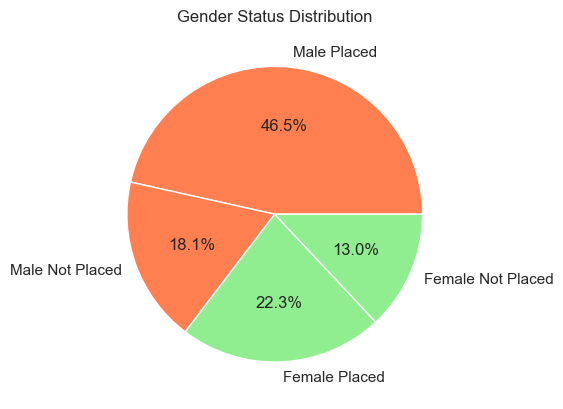

<Figure size 1200x800 with 0 Axes>

In [95]:
plt.pie(
        x=[
        len(df_placement.query('gender == "M" and status == "Placed" ')),
        len(df_placement.query('gender == "M" and status == "Not Placed" ')),
        len(df_placement.query('gender == "F" and status == "Placed" ')),
        len(df_placement.query('gender == "F" and status == "Not Placed" '))
        ],
        labels=['Male Placed', 'Male Not Placed', 'Female Placed','Female Not Placed'],
        autopct='%1.1f%%',
        colors=['coral', 'coral', 'lightgreen', 'lightgreen'],
)
plt.title('Gender Status Distribution')
plt.figure(figsize=(12, 8))
plt.show()

In [96]:
df_placement.nunique()

gender                   2
ssc_percentage         103
ssc_board                2
hsc_percentage          97
hsc_board                2
hsc_subject              3
degree_percentage       89
undergrad_degree         3
work_experience          2
emp_test_percentage    100
specialisation           2
mba_percent            205
status                   2
dtype: int64

In [97]:
df_placement.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

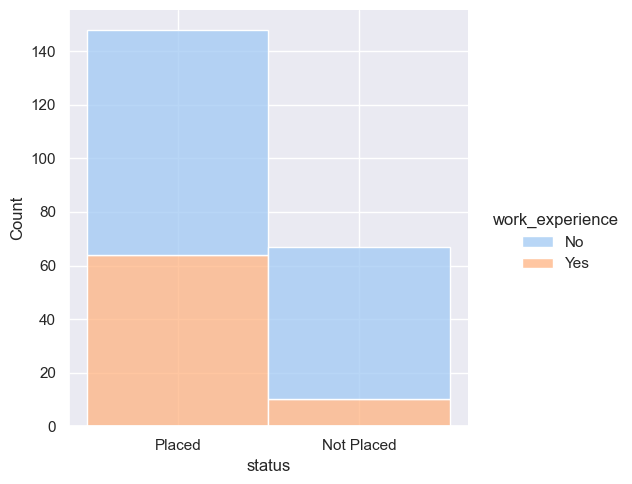

In [98]:
sns.displot(df_placement, x="status", hue="work_experience", palette='pastel', multiple="stack")


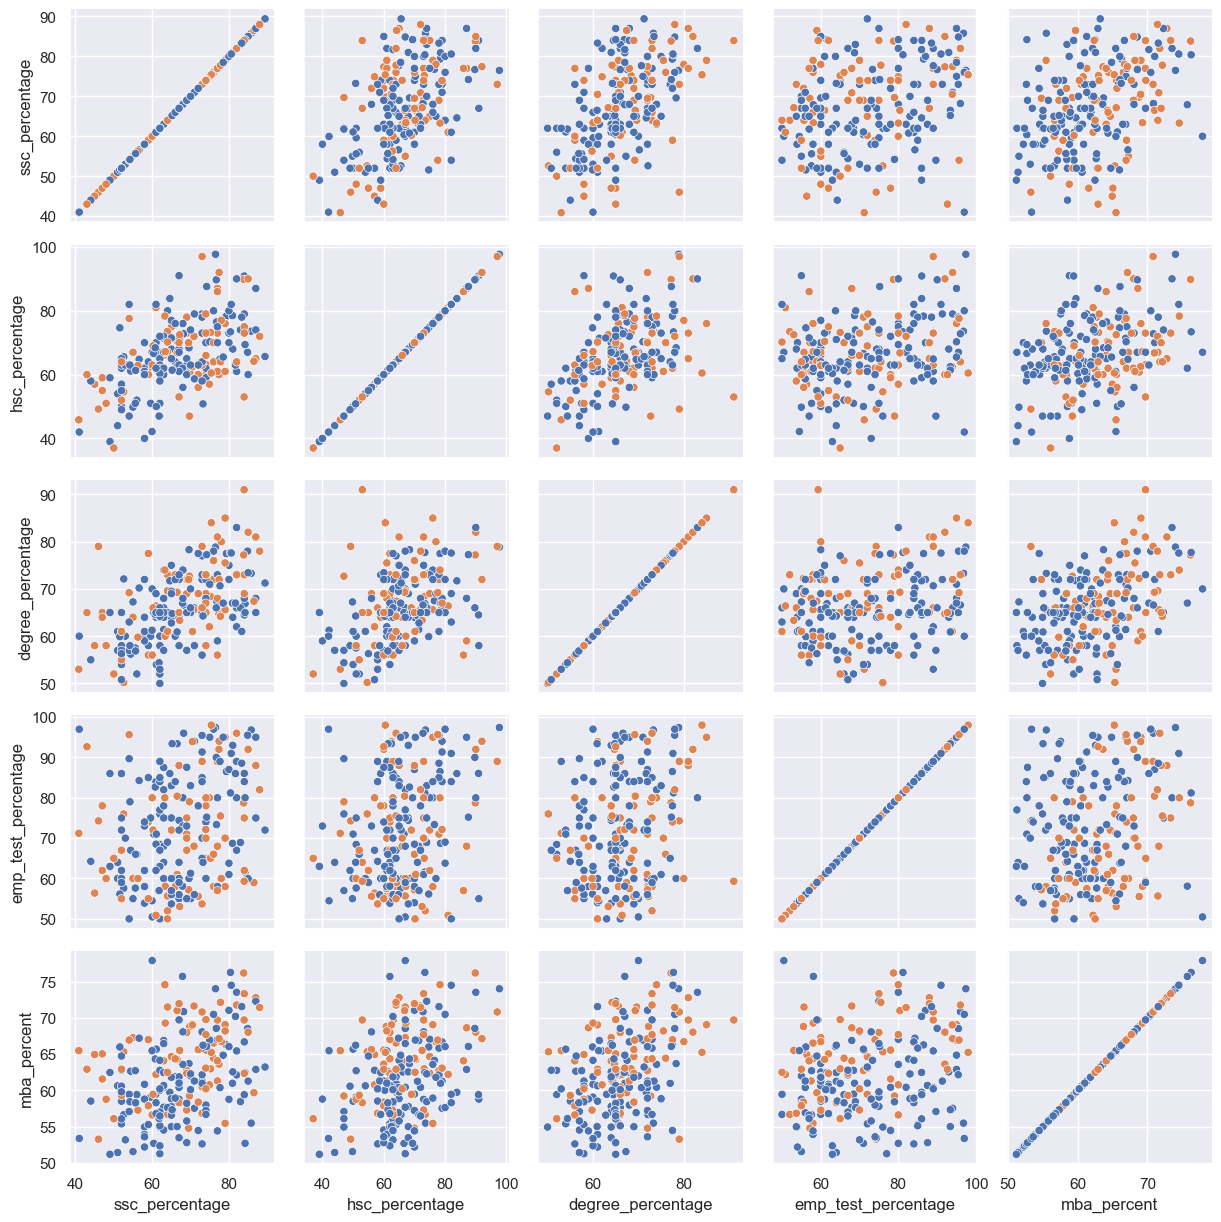

In [99]:
g = sns.PairGrid(df_placement, hue='gender')
g.map(sns.scatterplot)

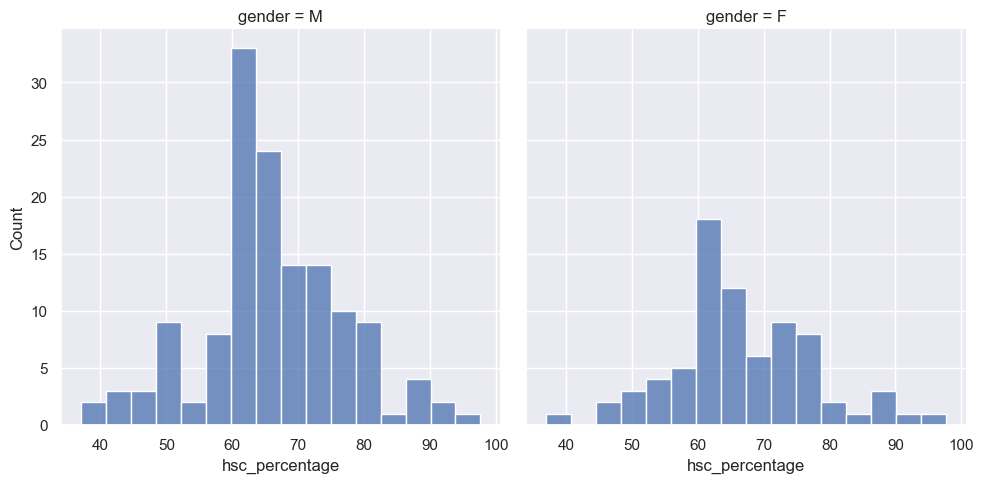

In [100]:
sns.displot(df_placement, x="hsc_percentage", col="gender")

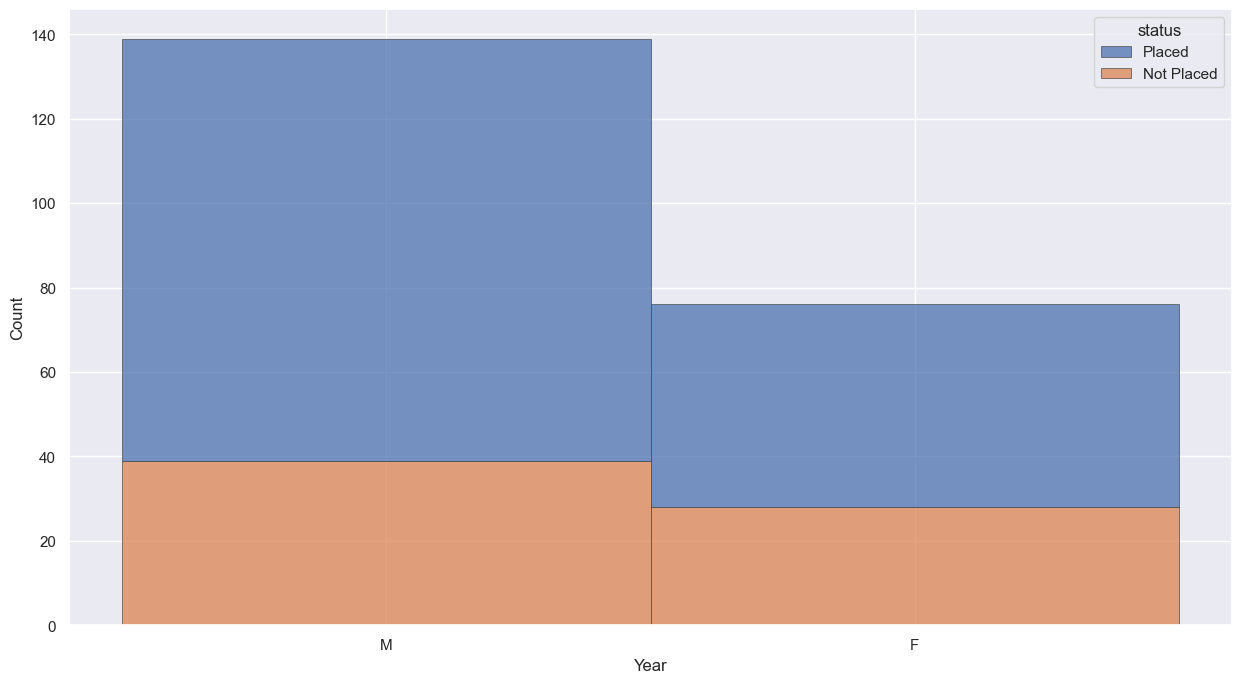

In [101]:
plt.figure(figsize=(15,8))
plt.title('')
plt.ylabel('Count')
plt.xlabel('Year')
sns.histplot(data = df_placement, x = 'gender',  hue='status',
             color='orange',
                 multiple="stack",
                edgecolor=".3",
                linewidth=.5,
     )
plt.show()